## RhMOP130A M2 synthesis reaction analysis
Analysis of HPAEC-PAD run from 23-24/11-22 on incubations from 30/10-22.

Reactions were ran as follows:
* Enzyme load: 0.405mg/ml (approx 50nkat/ml according to activity determination)
* PO4 source: 10 mM M1P
* Acceptor: 10 mM M2
* Buffer: 50 mM sodium citrate pH 5.2
* Reaction time: 24h with aliquots taken [0, 0.5, 1, 24] h
* termination: boiling at 95 °C for 5 min
* reaction volume: 100 μl with 4 x 10 μl aliquotes -> 60% remaining reaction volume
* controls: M1P + M2, enzyme, buffer

aliquots of the reaction were diluted 300x  (10 mM original substrate concentration -> 33.33 μM), filtered and put in HPAEC vials prior to injection onto IC5000 system, following HPAEC protocol provided in group and AB's oligosacharide quantification injection program.

A standard of M1 -> M5 was constructed with conc. [0 1.25 2.5 5 10 20 25 40] μM as well.

In [227]:
# HPAEC analysis 221125
from HPAEC_analysis import load_hpaec_data, plot_hpaec_chromatograms
from utils.activity_assay import estimate

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress as linreg
import seaborn as sns


# load HPAEC chromatograms
df = load_hpaec_data(
    "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/Current Projects/GH130 paper/Raw Data/HPAEC-PAD/RhMOP130A M2 synthesis reactions 221124/20221123 RhMOP130A 10mM M2 10mM M1P 50mM citrate pH 5.2/",
    skip_rows=44, 
    filetype=".txt",
)

fetching data from 10µM M1-M5 std 2_ED_1.txt...
fetching data from RhMOP130A + M2 + M1P 0h 2 25µM_ED_1.txt...
fetching data from MQ_ED_1.txt...
fetching data from 1.25µM M1-M5 std 1_ED_1.txt...
fetching data from RhMOP130A + M2 + M1P 0h 1 25µM_ED_1.txt...
fetching data from RhMOP130A + M2 + M1P 0.5h 1 25µM_ED_1.txt...
fetching data from buffer ctrl_ED_1.txt...
fetching data from 40µM M1-M5 std 1_ED_1.txt...
fetching data from RhMOP130A + M2 + M1P 24h 3 25µM_ED_1.txt...
fetching data from 25µM M1-M5 std 2_ED_1.txt...
fetching data from 5µM M1-M5 std 2_ED_1.txt...
fetching data from 20µM M1-M5 std 2_ED_1.txt...
fetching data from RhMOP130A + M2 + M1P 1h 1 25µM_ED_1.txt...
fetching data from 2.5µM M1-M5 std 1_ED_1.txt...
fetching data from 40µM M1-M5 std 2_ED_1.txt...
fetching data from 100µM M1-M5 std 1_ED_1.txt...
fetching data from 25µM M1-M5 std 1_ED_1.txt...
fetching data from 1.25µM M1-M5 std 2_ED_1.txt...
fetching data from M2+M1P 24h ctrl 1 25µM_ED_1.txt...
fetching data from 10µM

# Standard data analysis

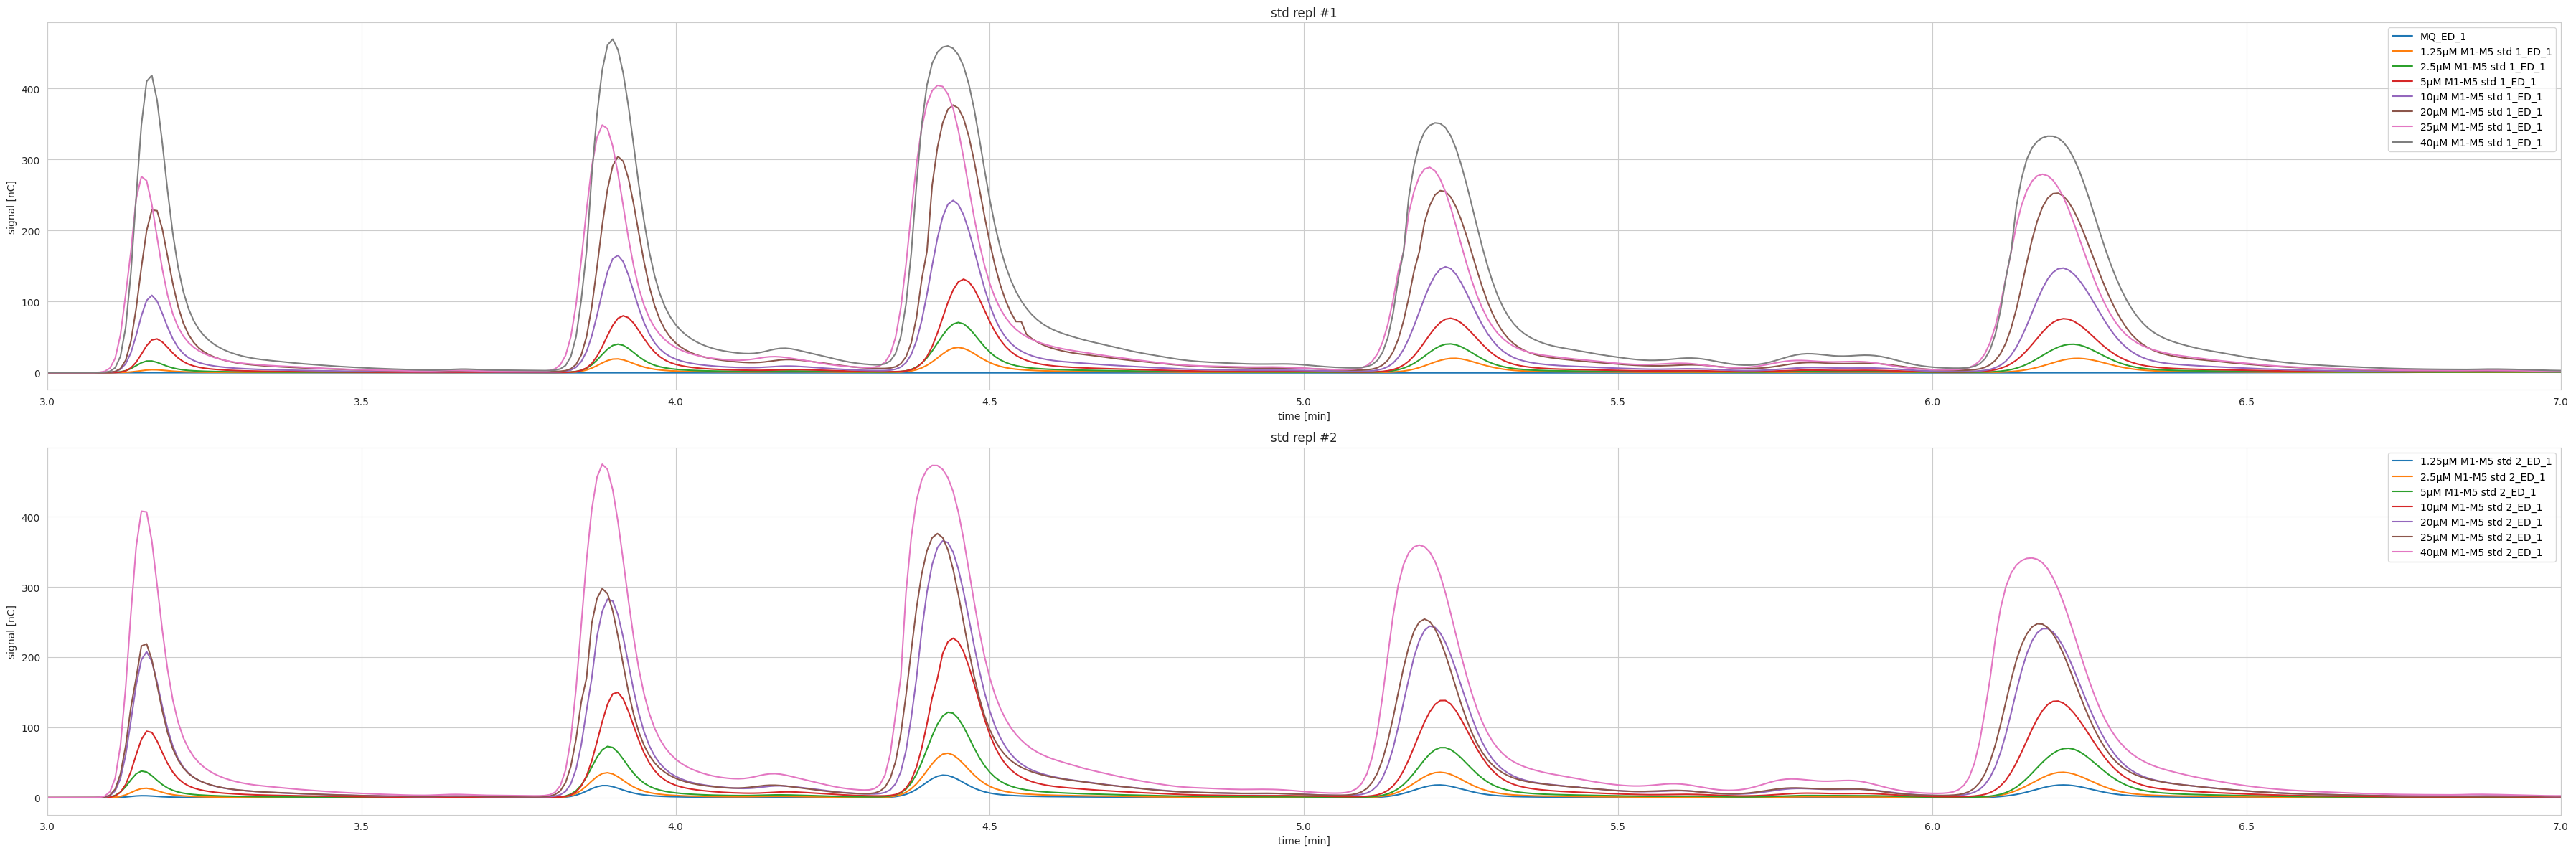

In [229]:
# Plotting the standard injections

# define which chromatograms to plot
chrom = [
    [
        "MQ_ED_1",
        "1.25µM M1-M5 std 1_ED_1",
        "2.5µM M1-M5 std 1_ED_1",
        "5µM M1-M5 std 1_ED_1",
        "10µM M1-M5 std 1_ED_1",
        "20µM M1-M5 std 1_ED_1",
        "25µM M1-M5 std 1_ED_1",
        "40µM M1-M5 std 1_ED_1",
    ],
    [
        "1.25µM M1-M5 std 2_ED_1",
        "2.5µM M1-M5 std 2_ED_1",
        "5µM M1-M5 std 2_ED_1",
        "10µM M1-M5 std 2_ED_1",
        "20µM M1-M5 std 2_ED_1",
        "25µM M1-M5 std 2_ED_1",
        "40µM M1-M5 std 2_ED_1",
    ],
]

# enter titles of subplots
plts = ["std repl #1", "std repl #2"]

plot = plot_hpaec_chromatograms(data=df, plots=plts, chromatograms=chrom, xlim=[3,7])

In [233]:
# Calculate linear regression for each peak

# concentration of standard samples
std_conc = [1.25, 2.5, 5, 10, 20, 25, 40] # uM

# replicate #1 and #2, unit is peak area [nC * min], peaks are M1, M2, M3, M4, and M5
std_peak_area_1 = pd.DataFrame(
        {
        "peak":   ["M1",   "M2",  "M3",  "M4",  "M5" ],
        "1.25 μM":[ 0.279, 1.567, 3.502, 2.140, 2.563],
        "2.50 μM":[ 1.168, 3.246, 7.061, 4.296, 5.199],
        "5.00 μM":[ 3.447, 6.740,13.096, 8.608, 9.728],
        "10.0 μM":[ 7.820,13.850,26.646,17.810,20.780],
        "20.0 μM":[17.210,27.337,43.275,33.004,36.254],
        "25.0 μM":[20.562,31.915,53.674,38.257,44.834],
        "40.0 μM":[32.595,46.433,70.686,52.705,61.344],
        }
).assign(id="replicate #1").set_index(keys="peak")

std_peak_area_2 = pd.DataFrame(
        {
        "peak":   ["M1",   "M2",  "M3",  "M4",  "M5" ],
        "1.25 μM":[ 0.203, 1.420, 3.184, 2.061, 2.347],
        "2.50 μM":[ 0.967, 2.949, 6.432, 3.942, 4.787],
        "5.00 μM":[ 2.705, 6.079,12.766, 8.260, 9.625],
        "10.0 μM":[ 7.022,12.780,24.996,16.654,19.284],
        "20.0 μM":[15.717,25.434,44.922,31.526,36.770],
        "25.0 μM":[16.233,26.165,46.550,32.788,38.475],
        "40.0 μM":[31.945,46.502,71.811,53.890,63.019],
        }
).assign(id="replicate #2").set_index("peak")

# Merge into one Dataframe
df = pd.concat([std_peak_area_1,std_peak_area_2])

# calculate mean and std for each peak
std_peak_area_mean = df.groupby(by="peak", axis=0).mean()
std_peak_area_std  = df.groupby(by="peak", axis=0).std()

# initialize empty dataframe for std equations
std_eq = {}

# cute message
print("RESULTS OF LINREG:")

# make linear regression object for each peak, i.e M1 -> M5
for peak in list(std_peak_area_mean.index.values):

        # make linear regression with x = standard conc, and y = peak area then store regression data in dict
        std_eq[peak] = linreg(std_conc,std_peak_area_mean.loc[peak].tolist())    


        print(f"{peak}: area = {std_eq[peak].slope:.2f} * c + {std_eq[peak].intercept:.2f}")




RESULTS OF LINREG:
M1: area = 0.82 * c + -0.90
M2: area = 1.16 * c + 0.82
M3: area = 1.76 * c + 4.47
M4: area = 1.33 * c + 2.11
M5: area = 1.55 * c + 2.37


/var/folders/zs/6691_xn15_97rvrv9btm9t8w0000gn/T/ipykernel_66597/2350354211.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_peak_area_mean = df.groupby(by="peak", axis=0).mean()
/var/folders/zs/6691_xn15_97rvrv9btm9t8w0000gn/T/ipykernel_66597/2350354211.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_peak_area_std  = df.groupby(by="peak", axis=0).std()


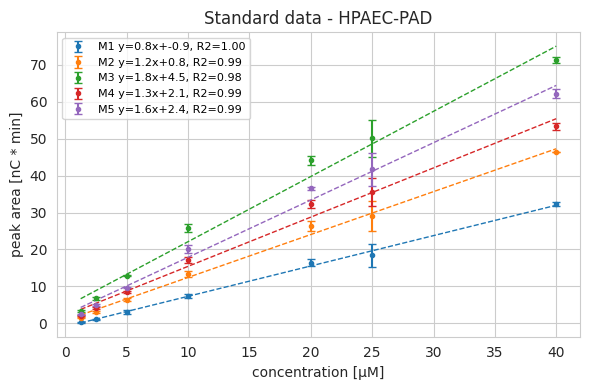

In [254]:
# printing std data

# create figure object
f = plt.figure(figsize=(6,4))

# style of plot
with sns.axes_style("whitegrid"):

    # for each peak, i.e M1 -> M5
    for peak in list(std_peak_area_mean.index.values):

        # generate temp df with mean std and conc.
        df = pd.concat([std_peak_area_mean.loc[peak], std_peak_area_std.loc[peak]], axis=1,keys=["mean","std"])
        df["conc"] = std_conc

        # plot area vs conc
        df.plot( 
            kind= "line", # line plot
            fmt = ".",    # dot size and shape
            x= "conc",    # concentrations form std_conc
            y= "mean",    # mean values of peak areas
            yerr= "std",  # standard errors of peak areas
            label= f"{peak} y={std_eq[peak].slope:.1f}x+{std_eq[peak].intercept:.1f}, R2={std_eq[peak].rvalue**2:0.2f}",
            capsize = 3,  # size of error caps
            ax= plt.gca(),# add plot to current axes
        )

# reset color cycle
plt.gca().set_prop_cycle(None)

# plot std equations
with sns.axes_style("whitegrid"):

    # for each peak, i.e M1 -> M5
    for peak in list(std_peak_area_mean.index.values):

        # plot each std eq as a line
        plt.plot(
            std_conc, # x values are conc. from curve
            [x*std_eq[peak].slope+std_eq[peak].intercept for x in std_conc], # y is calculated area for each conc.
            "--", # dashed lines
            linewidth = 1,
            #label = f"std eq ({peak})", # legend entry should be the peak, i.e M1, M2, etc.
            )

# show data 
plt.xlabel("concentration [μM]")
plt.legend(loc="best",  prop={'size': 8})
plt.ylabel("peak area [nC * min]")
plt.title("Standard data - HPAEC-PAD")
f.tight_layout()

plt.show()



## Sample Analysis

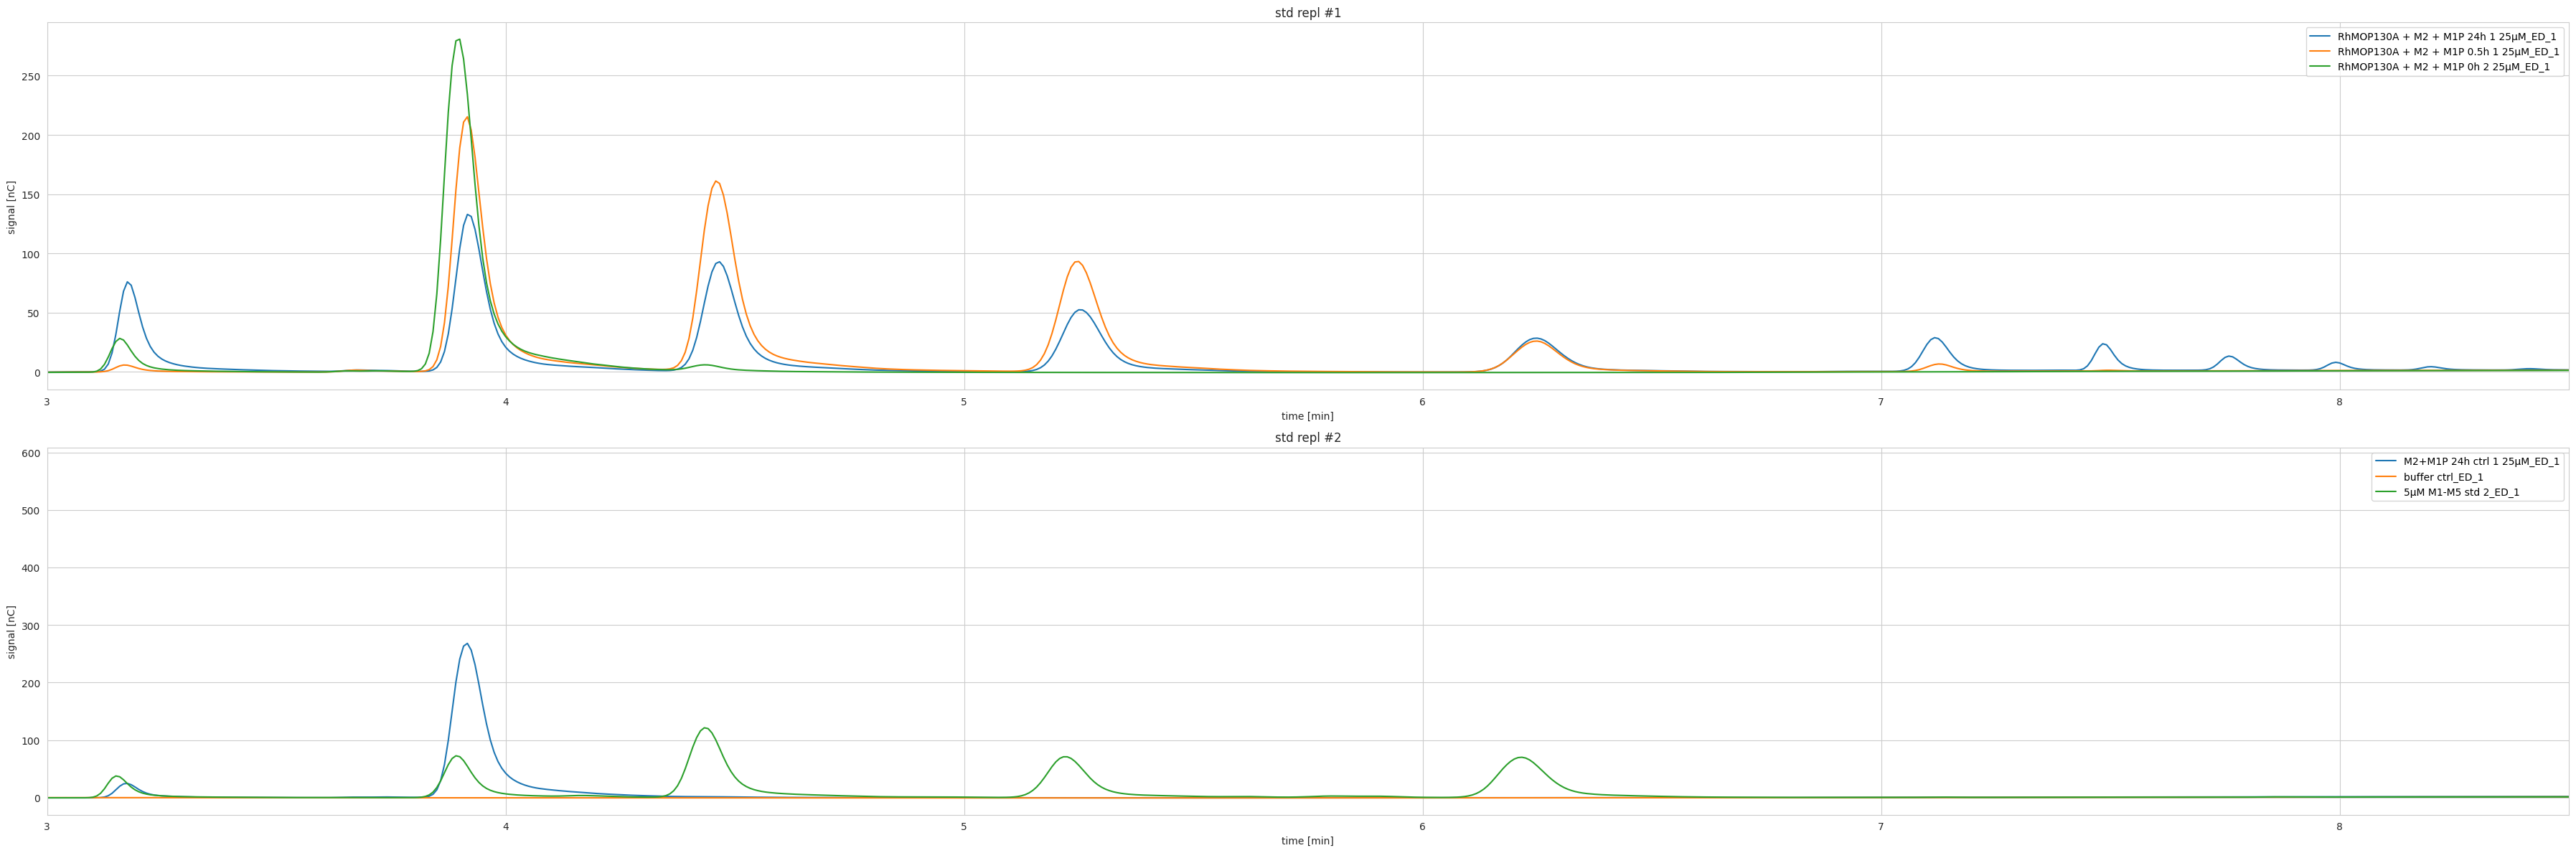

In [157]:
# Plotting the sample chromatograms

# define which chromatograms to plot
chrom = [
    [
        "RhMOP130A + M2 + M1P 24h 1 25µM_ED_1",
        #"RhMOP130A + M2 + M1P 24h 2 25µM_ED_1",
        #"RhMOP130A + M2 + M1P 24h 3 25µM_ED_1",
        #"RhMOP130A + M2 + M1P 1h 1 25µM_ED_1",
        "RhMOP130A + M2 + M1P 0.5h 1 25µM_ED_1",
        #"RhMOP130A + M2 + M1P 0h 1 25µM_ED_1",
        "RhMOP130A + M2 + M1P 0h 2 25µM_ED_1",
    ],
    [
        "M2+M1P 24h ctrl 1 25µM_ED_1",
        "buffer ctrl_ED_1",
        "5µM M1-M5 std 2_ED_1",
    ],
]

# enter titles of subplots
plts = ["std repl #1", "std repl #2"]

# plot function from HPAEC analysis script
plot_hpaec_chromatograms(data=df,plots=plts,chromatograms=chrom,xlim=[3,8.5])

In [201]:
# Calculating sample concentrations

# sample peak areas from HPAEC reports
sample_peak_area = pd.DataFrame(
        {
        "peak": [ "M1", "M2",   "M3",    "M4",   "M5", ],
        "0h 1": [ 2.525, 36.562, 0.871,  0.000,  0.000,], #1
        "0h 2": [ 2.026, 36.353, 0.000,  0.000,  0.000,], #2
        "0.5h": [ 0.426, 19.806, 17.542, 11.222, 3.451,], #1
        "24h 1":[ 5.559, 11.611, 9.160,  6.212,  3.746,], #1
        "24h 2":[ 1.736, 8.208,  6.134,  3.523,  1.937,], #2
        "24h 3":[ 4.419, 9.883,  6.245,  4.008,  2.442,], #3
        },
).set_index("peak")

# compile mean of each replicate
sample_peak_area_mean = pd.DataFrame({})
sample_peak_area_mean["0h"]  = sample_peak_area.loc[:,['0h 1',  '0h 2',        ]].mean(axis=1)
sample_peak_area_mean["0.5h"]= sample_peak_area.loc[:,['0.5h',                 ]].mean(axis=1)
sample_peak_area_mean["24h"] = sample_peak_area.loc[:,['24h 1', '24h 2','24h 3']].mean(axis=1)

# compile std of each replicate
sample_peak_area_std = pd.DataFrame({})
sample_peak_area_std["0h"]  = sample_peak_area.loc[:,['0h 1',  '0h 2',        ]].std(axis=1)
sample_peak_area_std["0.5h"]= sample_peak_area.loc[:,['0.5h',                 ]].std(axis=1)
sample_peak_area_std["24h"] = sample_peak_area.loc[:,['24h 1', '24h 2','24h 3']].std(axis=1)


concentrations in reaction [mM]:
     0h  0.5h  24h
M1 1.16  0.49 1.76
M2 9.21  4.91 2.35
M3 0.00  2.22 0.46
M4 0.00  2.05 0.56
M5 0.00  0.21 0.07

correponding to mannosyl yield in reaction [%]:
      0h  0.5h   24h
M1  3.87  1.62  5.85
M2 61.39 32.70 15.64
M3  0.00 22.23  4.61
M4  0.00 27.37  7.43
M5  0.00  3.48  1.09

total synthesis yields [%]:
0h      0.00
0.5h   53.08
24h    13.13
dtype: float64


In [202]:
# calculate concentration from sample peak areas using std curves from std series
sample_peak_conc = pd.DataFrame({})
for peak in list(sample_peak_area_mean.index.values):
        sample_peak_conc[peak]= sample_peak_area_mean.loc[peak].apply(
                estimate,                           # function returns x, where x = (y - intercept) / slope
                slope= std_eq[peak].slope,          # slope of std curve corresponding to current peak
                intercept = std_eq[peak].intercept, # intercept of std curve corresponding to current peak
        )

# account for dilution factor
sample_stock_conc = sample_peak_conc.T.apply(lambda x: x * 300/1000) # 300x dilution * 1/1000 uM/mM
sample_stock_conc[sample_stock_conc<0]=0 # remove neg. values

with pd.option_context('display.float_format', '{:0.2f}'.format):
        print(f"concentrations in reaction [mM]:\n{sample_stock_conc}")


concentrations in reaction [mM]:
     0h  0.5h  24h
M1 1.16  0.49 1.76
M2 9.21  4.91 2.35
M3 0.00  2.22 0.46
M4 0.00  2.05 0.56
M5 0.00  0.21 0.07


In [203]:
# calculate yield of mannose incorporation
sample_mannosyl_amount = pd.DataFrame({}) # empty df
for i,peak in enumerate(list(sample_stock_conc.index.values)): # iterate of M1 -> M5

        # multiplying each mannoside by its amount of mannosyk units
        sample_mannosyl_amount[peak] = sample_stock_conc.loc[peak].apply(lambda x: x * (i+1))

# divide by total amount of added mannosyl units, i.e. [M1P] + 2 * [M2], 10mM + 2 * 10mM = 30mM
sample_mannosyl_yield = sample_mannosyl_amount.T.apply(lambda x: x / 30 * 100)

with pd.option_context('display.float_format', '{:0.2f}'.format):
        print(f"\ncorreponding to mannosyl yield in reaction [%]:\n{sample_mannosyl_yield}")

# sum each mannosyl yield >3 to get synthesis yield
with pd.option_context('display.float_format', '{:0.2f}'.format):
        print(f"\ntotal synthesis yields [%]:\n{sample_mannosyl_yield.iloc[2:,:].sum()}")



correponding to mannosyl yield in reaction [%]:
      0h  0.5h   24h
M1  3.87  1.62  5.85
M2 61.39 32.70 15.64
M3  0.00 22.23  4.61
M4  0.00 27.37  7.43
M5  0.00  3.48  1.09

total synthesis yields [%]:
0h      0.00
0.5h   53.08
24h    13.13
dtype: float64
